In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/Users/yongxingnie/Desktop/data science methods and tools/Final Projects/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/yongxingnie/Desktop/data science methods and tools/Final Projects/data/links.csv
/Users/yongxingnie/Desktop/data science methods and tools/Final Projects/data/.DS_Store
/Users/yongxingnie/Desktop/data science methods and tools/Final Projects/data/tags.csv
/Users/yongxingnie/Desktop/data science methods and tools/Final Projects/data/ratings.csv
/Users/yongxingnie/Desktop/data science methods and tools/Final Projects/data/README.txt
/Users/yongxingnie/Desktop/data science methods and tools/Final Projects/data/movies.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
links=pd.read_csv('/Users/yongxingnie/Desktop/data science methods and tools/Final Projects/data/links.csv',names=['movieid','imdbid','tmdbid'],header=None)
df_links=pd.DataFrame(links)
df_links.head()

,movieid,imdbid,tmdbid
0,movieId,imdbId,tmdbId
1,1,0114709,862
2,2,0113497,8844
3,3,0113228,15602
4,4,0114885,31357


In [4]:
movies=pd.read_csv('/Users/yongxingnie/Desktop/data science methods and tools/Final Projects/data/movies.csv',names=['movieid','title','genres'], header=None)
df_movies=pd.DataFrame(movies)
df_movies.head()

,movieid,title,genres
0,movieId,title,genres
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,2,Jumanji (1995),Adventure|Children|Fantasy
3,3,Grumpier Old Men (1995),Comedy|Romance
4,4,Waiting to Exhale (1995),Comedy|Drama|Romance


In [5]:
ratings=pd.read_csv('/Users/yongxingnie/Desktop/data science methods and tools/Final Projects/data/ratings.csv',names=['userid','movieid','rating','timestamp'],header=None)
df_ratings=pd.DataFrame(ratings)
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100837 entries, 0 to 100836
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   userid     100837 non-null  object
 1   movieid    100837 non-null  object
 2   rating     100837 non-null  object
 3   timestamp  100837 non-null  object
dtypes: object(4)
memory usage: 3.1+ MB


In [6]:
tags=pd.read_csv('/Users/yongxingnie/Desktop/data science methods and tools/Final Projects/data/tags.csv',names=['userid','movieid','tag','timestamp'],header=None)
df_tags=pd.DataFrame(tags)
df_tags.head()

,userid,movieid,tag,timestamp
0,userId,movieId,tag,timestamp
1,2,60756,funny,1445714994
2,2,60756,Highly quotable,1445714996
3,2,60756,will ferrell,1445714992
4,2,89774,Boxing story,1445715207


In [7]:
#Since we are not going to use the timestamp data, therefore we will drop it here.

In [8]:
df_tags.drop(['timestamp'],axis=1,inplace=True)
df_tags.head()

,userid,movieid,tag
0,userId,movieId,tag
1,2,60756,funny
2,2,60756,Highly quotable
3,2,60756,will ferrell
4,2,89774,Boxing story


In [9]:
df_ratings.drop(['timestamp'],axis=1,inplace=True)
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100837 entries, 0 to 100836
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   userid   100837 non-null  object
 1   movieid  100837 non-null  object
 2   rating   100837 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


In [10]:
df_ratings.isna().sum()

userid     0
movieid    0
rating     0
dtype: int64

In [11]:
#check the rating distribution

<AxesSubplot:xlabel='rating', ylabel='Density'>

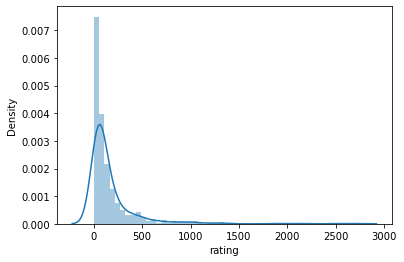

In [12]:
ratings_group_by=df_ratings.groupby('userid')['rating']
ratings_group_by=pd.DataFrame(ratings_group_by.count())
sns.distplot(ratings_group_by["rating"])

In [13]:
#A lot of users rated only few movies

<AxesSubplot:xlabel='rating', ylabel='Count'>

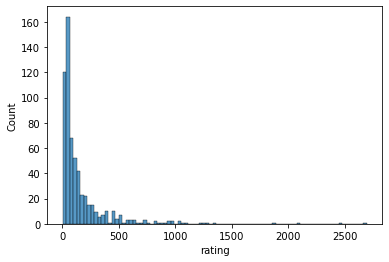

In [14]:
sns.histplot(ratings_group_by["rating"])

In [15]:
#To reduce the dimensionality of the dataset, I filtered out users rated less than 50 movies.

In [16]:
ratings_group_by=df_ratings.groupby('userid')['rating']
ratings_group_by=pd.DataFrame(ratings_group_by.count())
ratings_min50=ratings_group_by[ratings_group_by['rating']>=50].index
df_ratings=df_ratings[df_ratings['userid'].isin(ratings_min50)]

In [17]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93812 entries, 1 to 100836
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   userid   93812 non-null  object
 1   movieid  93812 non-null  object
 2   rating   93812 non-null  object
dtypes: object(3)
memory usage: 2.9+ MB


<AxesSubplot:xlabel='rating', ylabel='Density'>

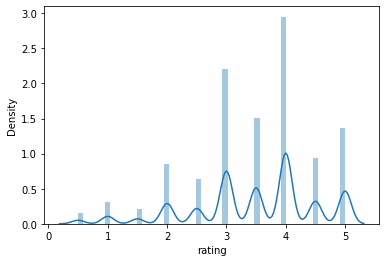

In [18]:
sns.distplot(df_ratings["rating"])

In [19]:
#After the filter out,
#Many users give movies rating of 3 or 4 as shown by the spike

<AxesSubplot:xlabel='rating', ylabel='Count'>

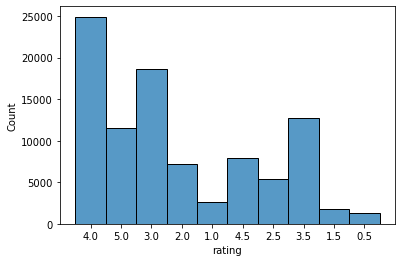

In [20]:
sns.histplot(df_ratings["rating"])

In [21]:
# more than 20K movies have ratings of 4
# more than 15K movies have ratings of 3

In [22]:
#check top rated movies

<AxesSubplot:xlabel='rating', ylabel='Density'>

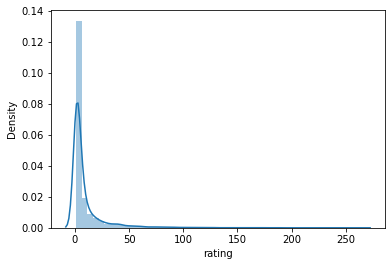

In [23]:
ratings_by_movie=df_ratings.groupby('movieid')['rating']
ratings_movie=pd.DataFrame(ratings_by_movie.count())
sns.distplot(ratings_movie["rating"])

<AxesSubplot:xlabel='rating', ylabel='Count'>

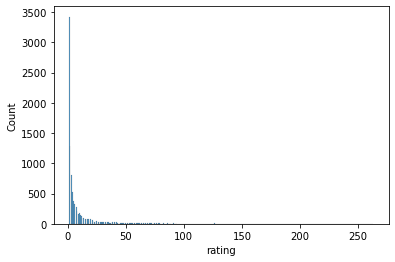

In [24]:
sns.histplot(ratings_movie["rating"])

In [25]:
#The spike shows that a lot of movies are rarely rated by users.
#filter out movies that was rated lower than 25 times.

<AxesSubplot:xlabel='rating', ylabel='Density'>

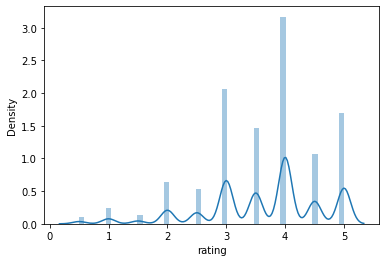

In [26]:
movies_group_by=df_ratings.groupby('movieid')['rating']
movies_group_by=pd.DataFrame(movies_group_by.count())
movies_min25=movies_group_by[movies_group_by['rating']>=25].index
df_ratings=df_ratings[df_ratings['movieid'].isin(movies_min25)]
sns.distplot(df_ratings["rating"])

<AxesSubplot:xlabel='rating', ylabel='Count'>

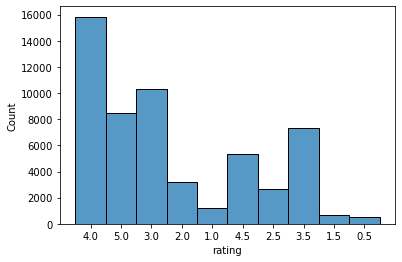

In [27]:
sns.histplot(df_ratings["rating"])

In [28]:
# more than 15K movies have ratings of 4
# more than 10K movies have ratings of 3

In [29]:
#Check the top rating count for users

In [30]:
ratings_user=df_ratings.groupby('userid')['rating']
ratings_user=pd.DataFrame(ratings_user.count())
ratings_user.head()

,rating
userid,
1,164
10,71
100,104
101,39
102,53


In [31]:
#There are two types of collaborative filtering, 
# one is based on a user's history, e.g. itmes he liked, users similar with him.
# the other one is based on the learning of the users.

In [32]:
#the mechanism of the two types of collaborative filtering are different.
# I will explore the surprise algorithm to determine which algorithms are suitable for this dataset

In [33]:
from surprise import accuracy
from surprise.model_selection.validation import cross_validate
from surprise.dataset import Dataset
from surprise.reader import Reader
from surprise import SVD
from surprise import KNNBasic
from surprise import KNNWithMeans
reader = Reader()
surprise_data = Dataset.load_from_df(df_ratings, reader)

from IPython.display import Markdown, display
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

In [34]:
#split data
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(surprise_data, test_size=0.3, random_state=10)

In [35]:
from surprise import NMF
from surprise import SVD
from surprise import KNNWithMeans
from surprise import KNNBaseline
from surprise import KNNBasic
from surprise import KNNWithZScore
from surprise import BaselineOnly
from surprise import CoClustering

benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), NMF(), KNNWithMeans(),  KNNBaseline(), KNNBasic(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, surprise_data, measures=['RMSE'], cv=5, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse') 

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Don

,test_rmse,fit_time,test_time
Algorithm,,,
KNNBaseline,0.828062,0.092648,0.974718
KNNWithZScore,0.837020,0.075213,0.914519
SVD,0.837175,0.356652,0.070520
BaselineOnly,0.837642,0.052678,0.051542
KNNWithMeans,0.837967,0.051646,0.838563
NMF,0.858484,0.645408,0.050883
CoClustering,0.879026,0.549452,0.038464
KNNBasic,0.887752,0.041338,0.758905


In [36]:
#According the RMSE score, I find that for the other users-based collarborative filtering, KNNBaseline has the best performance (rmse=0.828).
#while when based on the learning of the user, SVD has the best performance (rmse=0.837).

In [37]:
#Then I will explore two tyeps of collaborative filtering based on the above performance
#Firstly, user KNNBaseline to predict one user's ratings based on other users' ratings for a specific movie

In [38]:
# Defining a function to return the top n recommendings
from collections import defaultdict

def get_top_n(predictions, n=10):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [39]:
# Defining a collaborative filtering function
class collab_filtering_based_recommender_model():
    def __init__(self, model, trainset, testset, data):
        self.model = model
        self.trainset = trainset
        self.testset = testset
        self.data = data
        self.pred_test = None
        self.recommendations = None
        self.top_n = None
        self.recommenddf = None
    
    def fit_and_predict(self):        
        printmd('**Fitting the train data...**', color='brown')
        self.model.fit(self.trainset)
        
        printmd('**Predicting the test data...**', color='brown')
        self.pred_test = self.model.test(self.testset)        
        rmse = round(accuracy.rmse(self.pred_test), 3)
        printmd('**RMSE for the predicted result is ' + str(rmse) + '**', color='brown')   
        
        self.top_n = get_top_n(self.pred_test)
        self.recommenddf = pd.DataFrame(columns=['userId', 'movieId', 'Rating'])
        for item in self.top_n:
            subdf = pd.DataFrame(self.top_n[item], columns=['movieId', 'Rating'])
            subdf['userId'] = item
            cols = subdf.columns.tolist()
            cols = cols[-1:] + cols[:-1]
            subdf = subdf[cols]        
            self.recommenddf = pd.concat([self.recommenddf, subdf], axis = 0)        
        return rmse
    
    def cross_validate(self):
        printmd('**Cross Validating the data...**', color='brown')
        cv_result = cross_validate(self.model, self.data, n_jobs=-1)
        cv_result = round(cv_result['test_rmse'].mean(),3)
        printmd('**Mean CV RMSE is ' + str(cv_result)  + '**', color='brown')
        return cv_result
    
    def recommend(self, user_id, n=5):
        printmd('**Recommending top ' + str(n)+ ' movies for userid : ' + user_id + ' ...**', color='brown')
        
        df = self.recommenddf[self.recommenddf['userId'] == user_id].head(n)
        display(df)
        return df
    

In [40]:
# before applying the collaborative filtering model,
# I need to define a function to select N users for the KNNBaseline
from surprise.model_selection import RandomizedSearchCV

def find_best_model(model, parameters,data):
    clf = RandomizedSearchCV(model, parameters, n_jobs=-1, measures=['rmse'])
    clf.fit(data)             
    print(clf.best_score)
    print(clf.best_params)
    print(clf.best_estimator)
    return clf


In [41]:
# There are two steps to find a rating that a user would give to a movie
#1. finding users similar to the target user
#2. Calculate the rating based on the ratings from the similar users in step 1

In [42]:
# Finding the optimal model by radaomizedSearchCV to determine the similar users.
sim_options = {
    "name": ["msd", "cosine", "pearson", "pearson_baseline"],
    "min_support": [3, 4, 5],
    "user_based": [True],
}
params = { 'k': range(30,50,1), 'sim_options': sim_options}
clf = find_best_model(KNNBaseline, params, surprise_data)

{'rmse': 0.8165301770451453}
{'rmse': {'k': 34, 'sim_options': {'name': 'pearson_baseline', 'min_support': 3, 'user_based': True}}}
{'rmse': <surprise.prediction_algorithms.knns.KNNBaseline object at 0x7fce919b3370>}


In [43]:
knnbaseline = clf.best_estimator['rmse']
col_fil_knnbaseline = collab_filtering_based_recommender_model(knnbaseline, trainset, testset, surprise_data)

In [44]:
#Fit and predict
knnbaseline_rmse = col_fil_knnbaseline.fit_and_predict()

<span style='color:brown'>**Fitting the train data...**</span>

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


<span style='color:brown'>**Predicting the test data...**</span>

RMSE: 0.8321


<span style='color:brown'>**RMSE for the predicted result is 0.832**</span>

In [45]:
# Cross validate
knnbaseline_cv_rmse = col_fil_knnbaseline.cross_validate()

<span style='color:brown'>**Cross Validating the data...**</span>

<span style='color:brown'>**Mean CV RMSE is 0.817**</span>

In [46]:
# KNNBaeline recommending
result_knnb_user1 = col_fil_knnbaseline.recommend(user_id='1', n=5)
result_knnb_user2 = col_fil_knnbaseline.recommend(user_id='100', n=5)
result_knnb_user3 = col_fil_knnbaseline.recommend(user_id='400', n=5)

<span style='color:brown'>**Recommending top 5 movies for userid : 1 ...**</span>

,userId,movieId,Rating
0,1,50,4.967637
1,1,1270,4.897077
2,1,1210,4.851315
3,1,1275,4.849374
4,1,110,4.821752


<span style='color:brown'>**Recommending top 5 movies for userid : 100 ...**</span>

,userId,movieId,Rating
0,100,2396,4.471869
1,100,1213,4.404703
2,100,497,4.343822
3,100,2028,4.261374
4,100,1225,4.251952


<span style='color:brown'>**Recommending top 5 movies for userid : 400 ...**</span>

,userId,movieId,Rating


In [47]:
# KNNBaseline has a test RMSE value of 0.832 and cross validation RMSE value of 0.817

In [48]:
# SVD-prediction based on the learning og the user

In [49]:
# Find the optimal parameters by randomizedSearchCV
params= {
    "n_epochs": [5, 10, 15, 20],
    "lr_all": [0.002, 0.005],
    "reg_all": [0.4, 0.6]
}
clf = find_best_model(SVD, params, surprise_data)

{'rmse': 0.8466517902698815}
{'rmse': {'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.4}}
{'rmse': <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7fce779fa790>}


In [50]:
svd = clf.best_estimator['rmse']
col_fil_svd = collab_filtering_based_recommender_model(svd, trainset, testset, surprise_data)

In [51]:
#Fit and predict
svd_rmse = col_fil_svd.fit_and_predict()

<span style='color:brown'>**Fitting the train data...**</span>

<span style='color:brown'>**Predicting the test data...**</span>

RMSE: 0.8545


<span style='color:brown'>**RMSE for the predicted result is 0.854**</span>

In [52]:
svd_cv_rmse = col_fil_svd.cross_validate()

<span style='color:brown'>**Cross Validating the data...**</span>

<span style='color:brown'>**Mean CV RMSE is 0.847**</span>

In [53]:
#SVD Recommending
result_svd_user1 = col_fil_svd.recommend(user_id='1', n=5)
result_svd_user2 = col_fil_svd.recommend(user_id='100', n=5)
result_svd_user3 = col_fil_svd.recommend(user_id='400', n=5)

<span style='color:brown'>**Recommending top 5 movies for userid : 1 ...**</span>

,userId,movieId,Rating
0,1,50,4.562327
1,1,1089,4.534799
2,1,1617,4.50565
3,1,110,4.493021
4,1,1210,4.449132


<span style='color:brown'>**Recommending top 5 movies for userid : 100 ...**</span>

,userId,movieId,Rating
0,100,1213,4.177482
1,100,1225,4.15237
2,100,356,4.150095
3,100,2028,4.073981
4,100,1028,4.051492


<span style='color:brown'>**Recommending top 5 movies for userid : 400 ...**</span>

,userId,movieId,Rating


In [54]:
#SVD has a test RMSE value of 0.855 and cross validation RMSE value of 0.847
# which is a little bit higher than KNNBaseline
#AS for SVD, each user will have different movie recommended to them,
#as they are infered by filling out missing entries in the matrix during matrix factorization using SVD.

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estima